In [20]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [21]:
FIGSIZE = (14,8)

In [2]:
with open('..//data//simulated_covar_matrices.pickle', 'rb') as f:
    covar_matrices = pickle.load(f)

In [6]:
obs = list()
for m in covar_matrices:
    for o in m.flatten():
        obs.append(o)
        
        
k = np.array(obs)

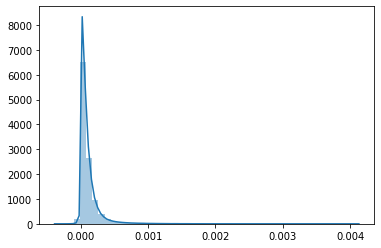

In [11]:
sbn.distplot(k)

In [13]:
with open('..//data//clean_data.pkl', 'rb') as f:
    df_change = pickle.load(f)

In [17]:
covars = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    if y%2 == 0:

        a = np.cov(df_change.loc[df_change.index.year==y].T)
        covars.append(a.flatten())
        _index.append(y)

In [18]:
obs = list()
for m in covars:
    for o in m.flatten():
        obs.append(o)
        
        
flat_covars = np.array(obs)

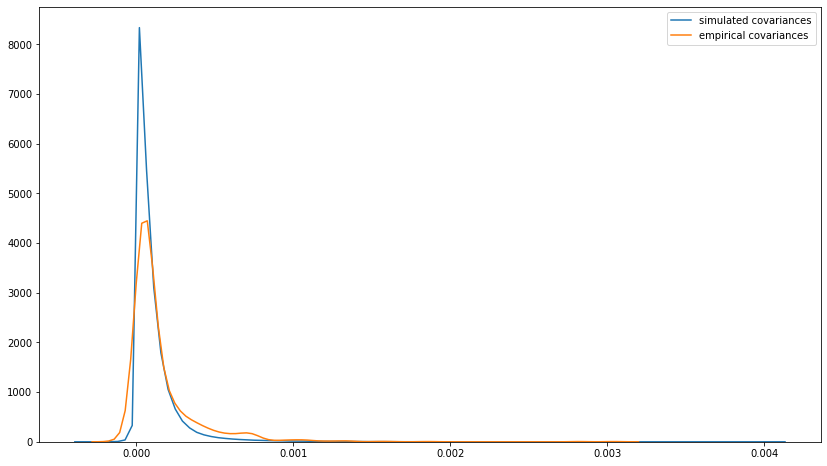

In [24]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)

ax = sbn.distplot(k, hist=False, label='simulated covariances')
ax = sbn.distplot(flat_covars, hist=False, label='empirical covariances')
ax.legend()

In [25]:
f.savefig('..//figures//dist_simulated_covariances.png')